The titanic dataset is a simple beginner dataset, available in Kaggle, mainly for beginners in machine learning. The objective is to predict the survival of passengers and upload your results in Kaggle to get an accuracy score. With the below code i was able to get a 80.4% accuracy reaching the top 16% among the Kagglers who submitted their predictions. This is my first project in machine learning so a lot of this has been inspired from different sources in the internet.

In [50]:
#importing the standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
#peek at the data
train_data.head()
train_data.shape
test_data.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

(418, 11)

### Variable Description
  
** 1. PassengerId **  
** 2. Survived: ** 0 for dead, 1 for survived  
** 3. Pclass: ** 1 for First class, 2 for Second class, 3 for third class  
** 4. Name **  
** 5. Sex **  
** 6. Age **  
** 7. SibSp: ** Number of siblings and spouse in the ship with the passenger  
** 8. Parch: ** Number of parents or children with the passenger in the ship  
** 9. Ticket: ** Ticket Number  
** 10. Fare **  
** 11. Cabin **  
** 12. Embarked: ** Port of embarkment  

So we need to predict survival of 418 passengers from the 891 passengers in the training set

# DATA VISUALIZATIONS

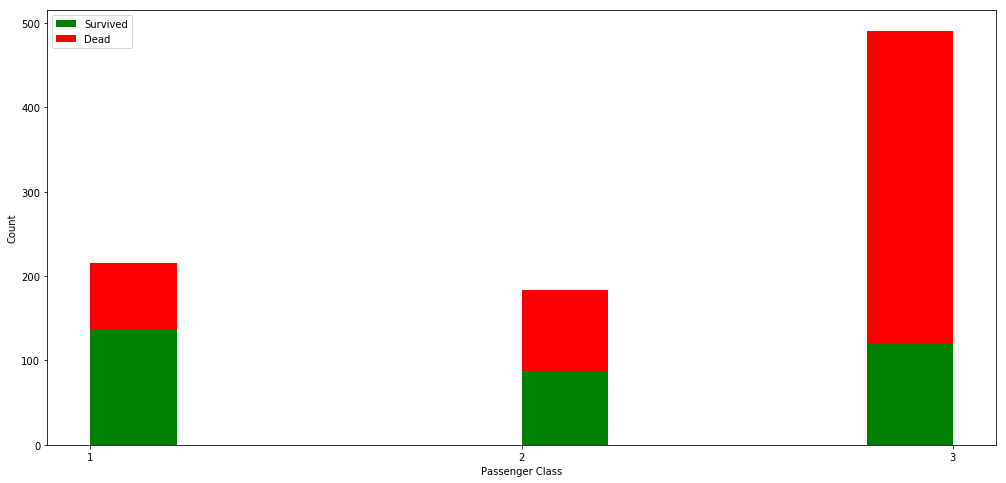

In [42]:
"""We need to predict whether 418 passengers survived or not"""

#Now lets see how survival is affected by the different independent variables
#Lets see how class passenger class affects survival
figure = plt.figure(figsize=(17,8))
plt.hist([train_data[train_data['Survived']==1]['Pclass'], train_data[train_data['Survived']==0]['Pclass']], stacked = True,
        color = ['g','r'], label = ['Survived','Dead'])
plt.xlabel('Passenger Class')
plt.ylabel('Count')
axes = plt.axes()
axes.set_xticks([1,2,3])
plt.legend()
plt.show()

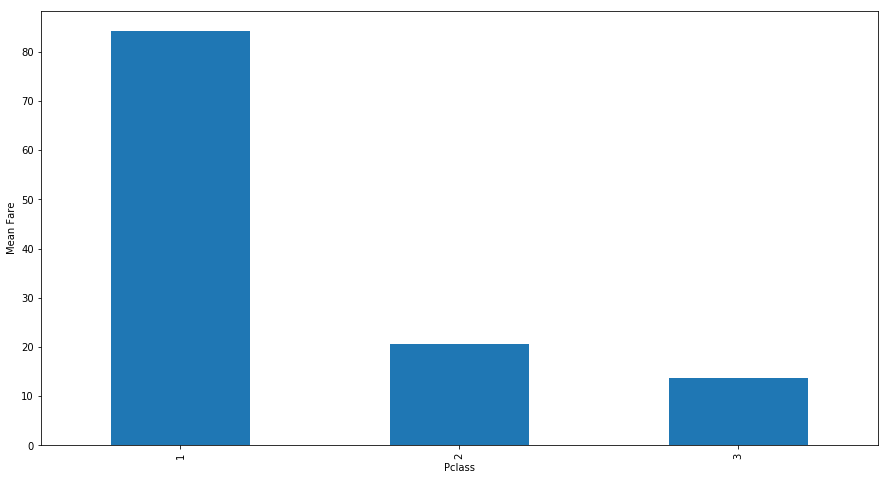

In [53]:
# people in class 3 has more chances of dying, RIP Karl Marx

#Fare and Pclass has to be co related. 

train_data.groupby('Pclass').mean()['Fare'].plot(kind = 'bar', figsize = (15,8))
plt.ylabel('Mean Fare')
plt.show()



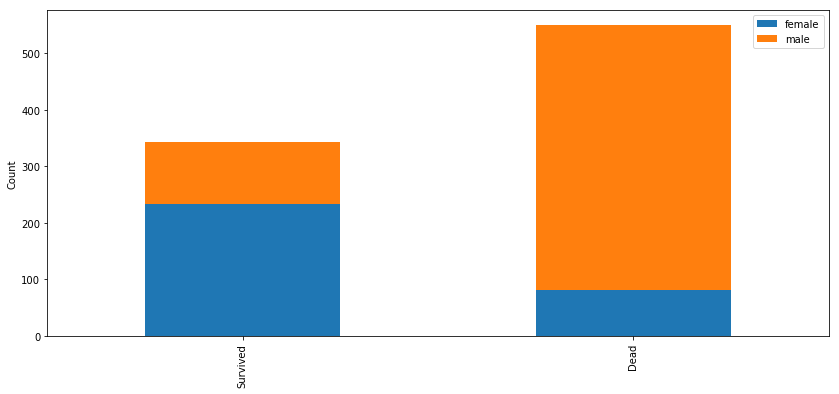

In [40]:
#First class passengers have paid more and has better chances of survival too

#now lets see how gender affects survival

live_sex = train_data[train_data['Survived']==1]['Sex'].value_counts()
dead_sex = train_data[train_data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([live_sex, dead_sex])
df.index = ['Survived', 'Dead']
df.plot(kind = 'bar', stacked = True, figsize = (14,6))
plt.ylabel('Count')
plt.show()

C:\Users\Ashwin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Ashwin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


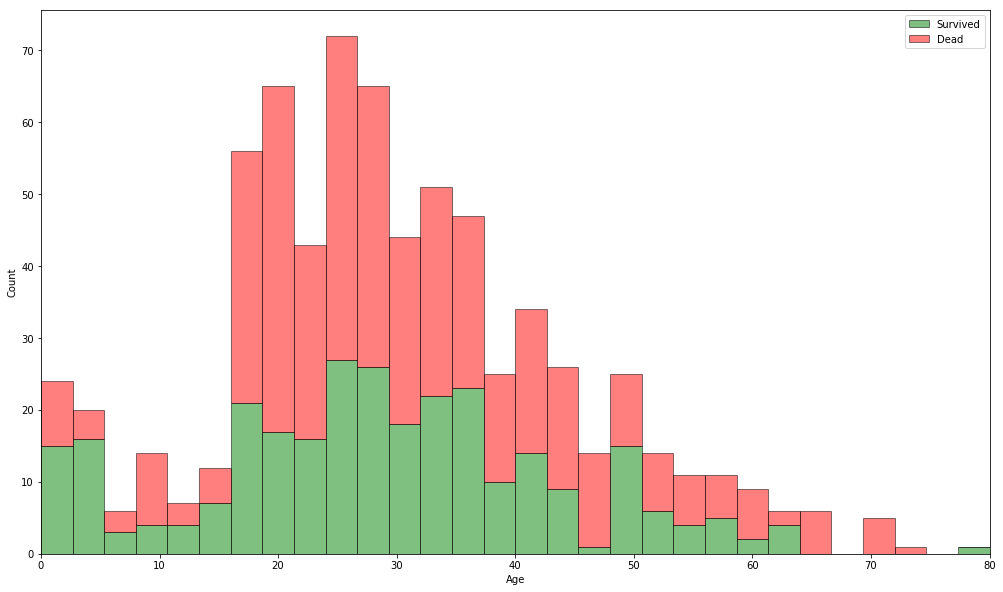

In [39]:
#Seems ladies had a better chance of survival. Guess they werent too keen on sharing floating chunks of wood

#lets see hwo age affected the chances of survival
figure = plt.figure(figsize=(17,10))
axes = plt.axes()
axes.set_xlim([0,80])
plt.hist([train_data[train_data['Survived']==1]['Age'], train_data[train_data['Survived']==0]['Age']], stacked = True,
        color = ['g','r'], bins = 30, range = [0,80], label = ['Survived','Dead'], ec = 'black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

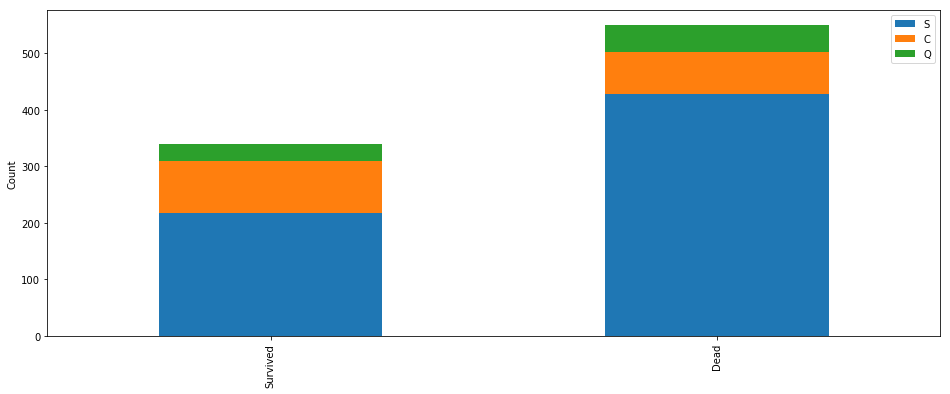

In [46]:
# kids(< 4 years) has a high chance of survival


#Now lets see if port of embarkment has any effect on survival
live_emb = train_data[train_data['Survived']==1]['Embarked'].value_counts()
dead_emb = train_data[train_data['Survived']==0]['Embarked'].value_counts()
df2 = pd.DataFrame([live_emb, dead_emb])
df2.index = ['Survived', 'Dead']
df2.plot(kind = 'bar', stacked = True, figsize = (16,6))
plt.ylabel('Count')
plt.show()


There seems to be no co relation there

# DATA PRE-PROCESSING

In [51]:


#Now lets combine the data and inspect the data
all_data = train_data.append(test_data, ignore_index = True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [52]:
#Age, cabin, embarked and fare has missing values.

#before we fill in missing values lets extract title from the name column

all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [53]:
""" the titles are in between a , and a .
    We'll extract the title from the name using a regex"""

all_data['Title'] = all_data.Name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)
all_data.Title.value_counts()

" the titles are in between a , and a .\n    We'll extract the title from the name using a regex"

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
the Countess      1
Lady              1
Don               1
Jonkheer          1
Dona              1
Capt              1
Sir               1
Mme               1
Name: Title, dtype: int64

In [54]:
from IPython.display import display
#Lets map all the decorated titles to one single title

title_dict = {
                    "Capt":        "Bigs",
                    "Col":         "Bigs",
                    "Major":       "Bigs",
                    "Jonkheer":    "Bigs",
                    "Don":         "Bigs",
                    "Sir" :        "Bigs",
                    "Dr":          "Bigs",
                    "Rev":         "Bigs",
                    "the Countess":"Bigs",
                    "Dona":        "Bigs",
                    "Mme":         "Mr",
                    "Mlle":        "Miss",
                    "Ms":          "Miss",
                    "Mr" :         "Mr",
                    "Mrs" :        "Mrs",
                    "Miss" :       "Miss",
                    "Master" :     "Master",
                    "Lady" :       "Bigs"
                }
all_data['Title'] = all_data['Title'].map(title_dict)

#Now to impute the age, lets see how title and age is corelated

grouped_title = all_data.groupby('Title')
display(grouped_title.median())
display(grouped_title.mean())

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Title,,,,,,,
Bigs,47.5,28.5000,0.0,661.0,1.0,0.0,0.0
Master,4.0,26.0000,1.0,788.0,3.0,1.0,1.0
Miss,22.0,15.2458,0.0,579.0,3.0,0.0,1.0
Mr,29.0,9.6875,0.0,662.5,3.0,0.0,0.0
Mrs,35.5,26.0000,0.0,755.0,2.0,1.0,1.0


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Title,,,,,,,
Bigs,45.178571,46.230603,0.137931,665.068966,1.344828,0.379310,0.347826
Master,5.482642,36.008195,1.377049,658.852459,2.655738,2.049180,0.575000
Miss,21.824366,42.566747,0.496212,617.928030,2.337121,0.655303,0.702703
Mr,32.237973,24.854975,0.159631,659.172823,2.379947,0.282322,0.158301
Mrs,36.994118,50.560723,0.832487,685.949239,1.939086,0.659898,0.792000


In [55]:
#Since age depends on title, we impute the mean of the age depending on the title

def impute_mean(series):
    return series.fillna(series.mean())

all_data['Age'] = grouped_title.Age.transform(impute_mean)

In [56]:
#We already saw that Fare and Passenger class is related, so we impute fare according to passenger class, by replacing missing values with median

grouped_pclass = all_data.groupby('Pclass')

def impute_median(series):
    return series.fillna(series.median())

all_data['Fare'] = grouped_pclass.Fare.transform(impute_median)

#Replace the single missing embarked value with the mode
all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode)

C:\Users\Ashwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Ashwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Ashwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


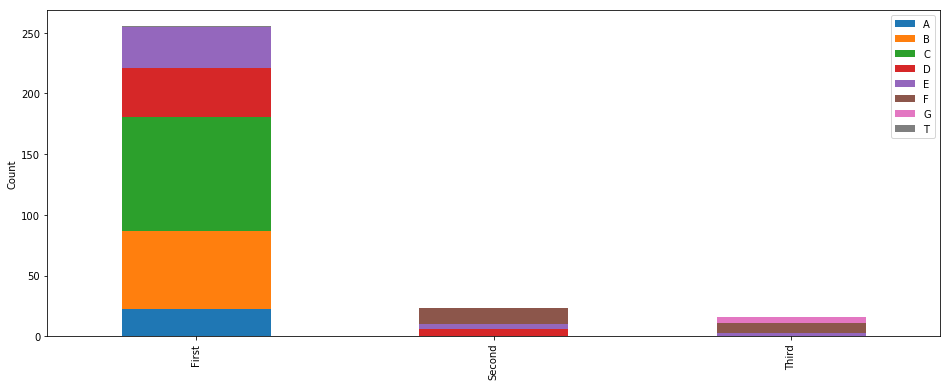

In [57]:
#lets extract the first letter of the Cabin variable 
all_data['Cabin'] = all_data.Cabin.astype(str).str[0]

#pandas replaces the nan values with 'n' so lets get rid of those columns so that we can plot  
all_data_cab = all_data[all_data['Cabin']!='n']

first_cab = all_data_cab[all_data['Pclass']==1]['Cabin'].value_counts()
sec_cab = all_data_cab[all_data['Pclass']==2]['Cabin'].value_counts()
third_cab = all_data_cab[all_data['Pclass']==3]['Cabin'].value_counts()
df2 = pd.DataFrame([first_cab, sec_cab, third_cab])
df2.index = ['First', 'Second', 'Third']
df2.plot(kind = 'bar', stacked = True, figsize = (16,6))
plt.ylabel('Count')
plt.show()

We can see that the First class people mostly occupy A,B,C,D and E cabins  
The second class D,E and F  
Third class people E,F,G and T  

So lets impute cabin values randomly depending on the class  

P.S I am actually imputing almost 1000 new values and im aware it makes no practical sense to do so


In [58]:
#Lets encode the cabin variables

dicti_cab = {
            'n':0,
            'A':1,
            'B':2,
            'C':3,
            'D':4,
            'E':5,
            'F':6,
            'G':7,
            'T':8
            }
all_data['Cabin'] = all_data.Cabin.map(dicti_cab)

import random    

#function to impute random cabin value depending on the class
def impute_cabin(pclass):
    if pclass==1:
        return random.randint(2,5)
    elif pclass==2:
        return random.randint(4,6)
    elif pclass==3:
        return random.randint(5,7)

for i in range(0,1309):
    if all_data.iloc[i,1]==0:
        all_data.iloc[i,1] = impute_cabin(all_data.iloc[i,7])


([array([ 163.,   89.,   59.,   21.,    3.,    3.,    4.,    0.,    0.,    0.]),
  array([ 537.,  161.,  102.,   29.,   15.,   22.,   12.,    6.,    0.,    7.])],
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 2 Lists of Patches objects>)

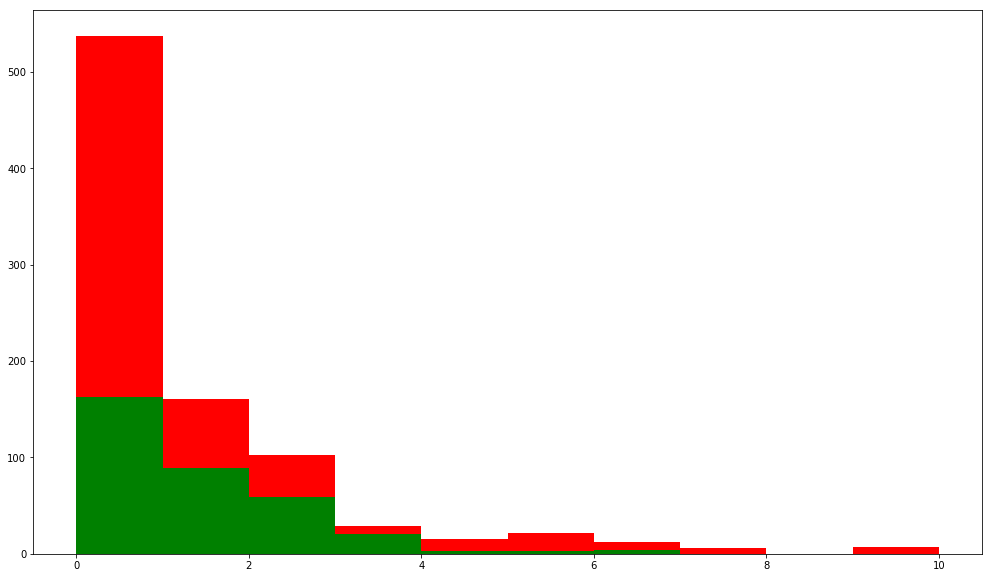

In [59]:
#Lets see how having family members 

#First compute family size
all_data['Fam_size'] = all_data['Parch'] + all_data['SibSp']

figure = plt.figure(figsize=(17,10))
plt.hist([all_data[all_data['Survived']==1]['Fam_size'],
          all_data[all_data['Survived']==0]['Fam_size']], stacked = True, color = {'r','g'})
plt.show()

In [60]:
# We see single people has less chance of survival, medium sized(1-4), and large(>4) has different rates of survival
#So lets encode the values and split them into different columns
all_data['Lone'] = all_data['Fam_size'].map(lambda c:1 if c==0 else 0)
all_data['Fam'] = all_data['Fam_size'].map(lambda c:1 if 1<=c<=4 else 0)
all_data['Bigfam'] = all_data['Fam_size'].map(lambda c:1 if c>4 else 0)

In [61]:
#Now lets encode the different categorical variables to dummies

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#encoding sex
labEnc = LabelEncoder()
all_data.Sex = labEnc.fit_transform(all_data.Sex)

#encoding embarked
labenc_embarked = LabelEncoder()
all_data.Embarked = labenc_embarked.fit_transform(all_data.Embarked.astype(str))
all_data.Embarked = all_data.Embarked.map(lambda c:c if c!=0 else 3)
embarked_dumm = pd.get_dummies(all_data.Embarked)
embarked_dumm.columns = ['emb_C', 'emb_Q', 'emb_S']
all_data = pd.concat([all_data,embarked_dumm], axis = 1)

#encoding title
labenc_title = LabelEncoder()
all_data.Title = labenc_title.fit_transform(all_data.Title)
title_dumm = pd.get_dummies(all_data.Title)
title_dumm.columns = ['Title_Bigs', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs']
all_data = pd.concat([all_data,title_dumm], axis = 1)


#encoding cabin
cabin_dumm = pd.get_dummies(all_data.Cabin, prefix ='Cabin')
all_data = pd.concat([all_data,cabin_dumm], axis = 1)


#encoding pclass
pclass_dumm = pd.get_dummies(all_data.Pclass, prefix ='Class')
all_data = pd.concat([all_data,pclass_dumm], axis = 1)

#Now lets take a look at our dataset
all_data.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Class_1,Class_2,Class_3
0,22.000000,5,3,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0,0,0,1,0,0,0,0,0,1
1,38.000000,3,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,26.000000,5,3,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0,0,0,1,0,0,0,0,0,1
3,35.000000,3,3,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,35.000000,7,3,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,0,0,0,0,0,1,0,0,0,1
5,32.237973,7,2,8.4583,"Moran, Mr. James",0,6,3,1,0,...,0,0,0,0,0,1,0,0,0,1
6,54.000000,5,3,51.8625,"McCarthy, Mr. Timothy J",0,7,1,1,0,...,0,0,0,1,0,0,0,1,0,0
7,2.000000,5,3,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,1,3,...,0,0,0,1,0,0,0,0,0,1
8,27.000000,5,3,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,0,...,0,0,0,1,0,0,0,0,0,1
9,14.000000,4,1,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,0,1,...,0,0,1,0,0,0,0,0,1,0


In [75]:
# We dont need Pclass, PassengerId, Fam_size, SibSp, Parch, Embarked, Cabin, Title

del all_data['Pclass']
del all_data['PassengerId']
del all_data['Fam_size']
del all_data['SibSp']
del all_data['Parch']
del all_data['Embarked']
del all_data['Cabin']
del all_data['Title']
del all_data['Name']
del all_data['Ticket']

#Now lets split the data back to training and test set
all_data = all_data[['Age', 'Fare', 'Sex', 'Lone', 'Fam', 'Bigfam', 'emb_C',
                    'emb_Q', 'emb_S', 'Title_Bigs', 'Title_Master', 'Title_Miss',
                    'Title_Mr', 'Title_Mrs', 'Cabin_1', 'Cabin_2', 'Cabin_3', 'Cabin_4',
                    'Cabin_5', 'Cabin_6', 'Cabin_7', 'Cabin_8', 'Class_1', 'Class_2',
                    'Class_3', 'Survived']]

X_train = all_data.iloc[0:891, :-1]
y_train = all_data.iloc[0:891, 25]
X_test = all_data.iloc[891:, :-1]

# MODELING 

I use Random Forest for this as it is quite accurate and resistant to outliers

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold

#Lets find out the importance of the features
classr = RandomForestClassifier(n_estimators = 50)
classr = classr.fit(X_train, y_train)

features = pd.DataFrame()
features['features'] = X_train.columns
features['importance'] = classr.feature_importances_
features.sort_values(by = ['importance'], ascending = False)

,features,importance
1,Fare,0.213296
0,Age,0.211906
2,Sex,0.154259
12,Title_Mr,0.090773
24,Class_3,0.042248
13,Title_Mrs,0.033531
11,Title_Miss,0.030706
22,Class_1,0.026287
4,Fam,0.023282
5,Bigfam,0.018218


In [77]:
#Lets eliminate unimportand features by setting the threshold as median
select_feat = SelectFromModel(classr, threshold = 'median', prefit = True)
X_train = select_feat.transform(X_train)
X_test = select_feat.transform(X_test)


In [78]:
# We'll use grid search to fine tune the hyper parameters
from sklearn.model_selection import GridSearchCV
params = {
        'n_estimators' : [80, 90, 100],
        'criterion' : ['entropy'],
        'max_features' : ['sqrt', 'log2', None],
        'max_depth' : [8, 9, 10],
        'min_samples_split' : [2],
        'min_samples_leaf' : [1],
        'min_impurity_split' : [1e-6]
          }
crv = StratifiedKFold(n_splits = 5)
grids = GridSearchCV(classr, params, scoring = 'accuracy', cv = crv, n_jobs = -1)
grids = grids.fit(X_train, y_train)
grids.best_score_
grids.best_params_


0.83838383838383834

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'min_impurity_split': 1e-06,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

In [80]:
#We'll use the newly obtained hyperparameters to retrain the classifer

classr = RandomForestClassifier(n_estimators = 90, criterion = 'entropy',
                                 max_features = None, max_depth = 8,
                                 min_samples_split = 2, min_samples_leaf = 1,
                                 min_impurity_split = 1e-06)
classr = classr.fit(X_train, y_train)

In [81]:
#I use kfold cross validation to see if its over fitted

from sklearn.model_selection import cross_val_score
crossval = cross_val_score(classr, X_train, y = y_train, cv = 10)
crossval.mean()
crossval.std()


0.83395358075133363

0.03982006108520933

In [82]:
# the model seems okay
y_pred = classr.predict(X_test)